In [1]:
import pymongo
from pymongo import MongoClient
import urllib 
import pandas as pd
import seaborn as sns
import mysql.connector

In [2]:
mongo_uri = "mongodb+srv://chindhual:"+ urllib.parse.quote("*****") +"@airbnbcluster.rrz4e4o.mongodb.net/?retryWrites=true&w=majority"
client = pymongo.MongoClient(mongo_uri)

In [3]:
client

MongoClient(host=['ac-7pnmpaz-shard-00-01.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-00.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-02.rrz4e4o.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-of0g3j-shard-0', tls=True)

In [4]:
db = client['sample_airbnb']
db

Database(MongoClient(host=['ac-7pnmpaz-shard-00-01.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-00.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-02.rrz4e4o.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-of0g3j-shard-0', tls=True), 'sample_airbnb')

In [5]:
table = db['listingsAndReviews']
table

Collection(Database(MongoClient(host=['ac-7pnmpaz-shard-00-01.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-00.rrz4e4o.mongodb.net:27017', 'ac-7pnmpaz-shard-00-02.rrz4e4o.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-of0g3j-shard-0', tls=True), 'sample_airbnb'), 'listingsAndReviews')

# Airbnb Table :

In [144]:
project={'_id':1,'listing_url':1,'name':1,'summary':1, 'space':1,
         'description':1, 'neighborhood_overview':1, 'notes':1, 'transit':1, 'access':1,
         'interaction':1, 'house_rules':1, 'property_type':1, 'room_type':1, 'bed_type':1, 
         'minimum_nights':1, 'maximum_nights':1, 'cancellation_policy':1, 'accommodates':1, 'bedrooms':1, 'beds':1,
        'number_of_reviews':1, 'bathrooms':1, 'amenities': 1, 'price':1, 'security_deposit':1, 'cleaning_fee':1, 
         'extra_people':1, 'guests_included':1}
res=table.find({},project)
airbnb_table=pd.DataFrame(res)
airbnb_table.head()

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,bedrooms,beds,number_of_reviews,bathrooms,amenities,price,security_deposit,cleaning_fee,extra_people,guests_included
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,3.0,5.0,51,1.0,"[TV, Cable TV, Wifi, Kitchen, Paid parking off...",80.00,200.00,35.00,15.00,6
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",,...,1.0,2.0,0,1.0,"[Wifi, Wheelchair accessible, Kitchen, Free pa...",317.00,NaN,187.00,0.00,1
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis",...,1.0,1.0,96,1.0,"[TV, Cable TV, Wifi, Air conditioning, Pool, K...",115.00,NaN,100.00,0.00,1
3,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Here exists a very cozy room for rent in a sha...,,,,,...,1.0,1.0,1,1.5,"[Internet, Wifi, Air conditioning, Kitchen, Bu...",40.00,NaN,NaN,0.00,1
4,10030955,https://www.airbnb.com/rooms/10030955,Apt Linda Vista Lagoa - Rio,Quarto com vista para a Lagoa Rodrigo de Freit...,,Quarto com vista para a Lagoa Rodrigo de Freit...,,,,,...,1.0,1.0,0,2.0,"[TV, Cable TV, Internet, Wifi, Air conditionin...",701.00,1000.00,250.00,0.00,1


In [145]:
airbnb_table.dtypes

_id                       object
listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
notes                     object
transit                   object
access                    object
interaction               object
house_rules               object
property_type             object
room_type                 object
bed_type                  object
minimum_nights            object
maximum_nights            object
cancellation_policy       object
accommodates               int64
bedrooms                 float64
beds                     float64
number_of_reviews          int64
bathrooms                 object
amenities                 object
price                     object
security_deposit          object
cleaning_fee              object
extra_people              object
guests_included           object
dtype: object

In [146]:
airbnb_table.isnull().sum()

_id                         0
listing_url                 0
name                        0
summary                     0
space                       0
description                 0
neighborhood_overview       0
notes                       0
transit                     0
access                      0
interaction                 0
house_rules                 0
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
accommodates                0
bedrooms                    5
beds                       13
number_of_reviews           0
bathrooms                  10
amenities                   0
price                       0
security_deposit         2084
cleaning_fee             1531
extra_people                0
guests_included             0
dtype: int64

In [147]:
airbnb_table['bedrooms'] = airbnb_table['bedrooms'].fillna(1)
airbnb_table['beds'] = airbnb_table['beds'].fillna(1)
airbnb_table['bathrooms'] = airbnb_table['bathrooms'].fillna(0)
airbnb_table['security_deposit'] = airbnb_table['security_deposit'].fillna(0)
airbnb_table['cleaning_fee'] = airbnb_table['cleaning_fee'].fillna(0)

In [148]:
airbnb_table.isnull().sum()

_id                      0
listing_url              0
name                     0
summary                  0
space                    0
description              0
neighborhood_overview    0
notes                    0
transit                  0
access                   0
interaction              0
house_rules              0
property_type            0
room_type                0
bed_type                 0
minimum_nights           0
maximum_nights           0
cancellation_policy      0
accommodates             0
bedrooms                 0
beds                     0
number_of_reviews        0
bathrooms                0
amenities                0
price                    0
security_deposit         0
cleaning_fee             0
extra_people             0
guests_included          0
dtype: int64

In [149]:
airbnb_table.dtypes

_id                       object
listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
notes                     object
transit                   object
access                    object
interaction               object
house_rules               object
property_type             object
room_type                 object
bed_type                  object
minimum_nights            object
maximum_nights            object
cancellation_policy       object
accommodates               int64
bedrooms                 float64
beds                     float64
number_of_reviews          int64
bathrooms                 object
amenities                 object
price                     object
security_deposit          object
cleaning_fee              object
extra_people              object
guests_included           object
dtype: object

In [150]:
airbnb_table['minimum_nights'] = pd.to_numeric(airbnb_table['minimum_nights'])
airbnb_table['maximum_nights'] = pd.to_numeric(airbnb_table['maximum_nights'])
airbnb_table['bathrooms'] = airbnb_table['bathrooms'].astype(str).astype(float)
airbnb_table['price'] = airbnb_table['price'].astype(str).astype(float)
airbnb_table['security_deposit'] = airbnb_table['security_deposit'].astype(str).astype(float)
airbnb_table['cleaning_fee'] = airbnb_table['cleaning_fee'].astype(str).astype(float)
airbnb_table['extra_people'] = airbnb_table['extra_people'].astype(str).astype(float)
airbnb_table['guests_included'] = airbnb_table['guests_included'].astype(str).astype(float)

In [151]:
airbnb_table.dtypes

_id                       object
listing_url               object
name                      object
summary                   object
space                     object
description               object
neighborhood_overview     object
notes                     object
transit                   object
access                    object
interaction               object
house_rules               object
property_type             object
room_type                 object
bed_type                  object
minimum_nights             int64
maximum_nights             int64
cancellation_policy       object
accommodates               int64
bedrooms                 float64
beds                     float64
number_of_reviews          int64
bathrooms                float64
amenities                 object
price                    float64
security_deposit         float64
cleaning_fee             float64
extra_people             float64
guests_included          float64
dtype: object

In [152]:
airbnb_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5555 non-null   object 
 1   listing_url            5555 non-null   object 
 2   name                   5555 non-null   object 
 3   summary                5555 non-null   object 
 4   space                  5555 non-null   object 
 5   description            5555 non-null   object 
 6   neighborhood_overview  5555 non-null   object 
 7   notes                  5555 non-null   object 
 8   transit                5555 non-null   object 
 9   access                 5555 non-null   object 
 10  interaction            5555 non-null   object 
 11  house_rules            5555 non-null   object 
 12  property_type          5555 non-null   object 
 13  room_type              5555 non-null   object 
 14  bed_type               5555 non-null   object 
 15  mini

In [153]:
print("Number of Duplicates in Airbnb based on URL :", airbnb_table['listing_url'].duplicated().sum())

Number of Duplicates in Airbnb based on URL : 0


<Axes: xlabel='price'>

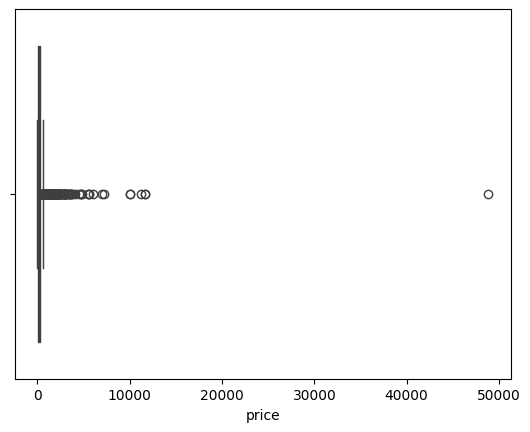

In [28]:
sns.boxplot(x=airbnb_table['price'])

In [154]:
#airbnb_table.describe()
include=['int','float']
airbnb_table.describe(include=include)

,minimum_nights,maximum_nights,accommodates,bedrooms,beds,number_of_reviews,bathrooms,price,security_deposit,cleaning_fee,extra_people,guests_included
count,5555.000000,5.555000e+03,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,5.564356,1.382776e+06,3.505851,1.411341,2.068947,27.606481,1.288839,278.766157,318.313771,68.147075,22.791899,1.747435
std,22.613861,5.256920e+07,2.297019,1.041547,1.618592,49.798376,0.703764,842.215531,1284.484759,102.782629,69.331511,1.487352
min,1.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,5.900000e+01,2.000000,1.000000,1.000000,1.000000,1.000000,70.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.125000e+03,3.000000,1.000000,2.000000,5.000000,1.000000,129.000000,0.000000,30.000000,0.000000,1.000000
75%,3.000000,1.125000e+03,4.000000,2.000000,3.000000,32.000000,1.000000,280.000000,250.000000,100.000000,20.000000,2.000000
max,1250.000000,2.147484e+09,16.000000,20.000000,25.000000,533.000000,16.000000,48842.000000,39228.000000,2000.000000,2346.000000,16.000000


In [156]:
airbnb_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\airbnb_table.csv',index=False)

# Images Table :

In [45]:
project={'_id':1, 'medium_url': '$images.medium_url', 'picture_url': '$images.picture_url', 'thumbnail_url': '$images.thumbnail_url', 'xl_picture_url': '$images.xl_picture_url'}
res=table.find({},project)
image_table=pd.DataFrame(res)
image_table.head()

,_id,medium_url,picture_url,thumbnail_url,xl_picture_url
0,10006546,,https://a0.muscache.com/im/pictures/e83e702f-e...,,
1,10009999,,https://a0.muscache.com/im/pictures/5b408b9e-4...,,
2,1001265,,https://a0.muscache.com/im/pictures/15037101/5...,,
3,10021707,,https://a0.muscache.com/im/pictures/72844c8c-f...,,
4,10030955,,https://a0.muscache.com/im/pictures/59c516bd-c...,,


In [46]:
image_table.isnull().sum()

_id               0
medium_url        0
picture_url       0
thumbnail_url     0
xl_picture_url    0
dtype: int64

In [47]:
image_table.dtypes

_id               object
medium_url        object
picture_url       object
thumbnail_url     object
xl_picture_url    object
dtype: object

In [48]:
image_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   _id             5555 non-null   object
 1   medium_url      5555 non-null   object
 2   picture_url     5555 non-null   object
 3   thumbnail_url   5555 non-null   object
 4   xl_picture_url  5555 non-null   object
dtypes: object(5)
memory usage: 217.1+ KB


In [35]:
image_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\image_table.csv',index=False)

# Host Table :

In [157]:
project={'_id':1, 
         'host_about': '$host.host_about', 
         'host_has_profile_pic': '$host.host_has_profile_pic', 
         'host_id': '$host.host_id',
         'host_identity_verified': '$host.host_identity_verified',
         'host_is_superhost': '$host.host_is_superhost',
         'host_listings_count': '$host.host_listings_count',
         'host_location': '$host.host_location',
         'host_name': '$host.host_name',
         'host_neighbourhood': '$host.host_neighbourhood',
         'host_picture_url': '$host.host_picture_url',
         'host_response_rate': '$host.host_response_rate',
         'host_response_time': '$host.host_response_time',
         'host_thumbnail_url': '$host.host_thumbnail_url',
         'host_total_listings_count': '$host.host_total_listings_count',
         'host_url': '$host.host_url',
         'host_verifications': '$host.host_verifications',
        }
res=table.find({},project)
host_table=pd.DataFrame(res)
host_table.head()

,_id,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_thumbnail_url,host_total_listings_count,host_url,host_verifications
0,10006546,"Gostamos de passear, de viajar, de conhecer pe...",True,51399391,True,False,3,"Porto, Porto District, Portugal",Ana&Gonçalo,,https://a0.muscache.com/im/pictures/fab79f25-2...,100.0,within an hour,https://a0.muscache.com/im/pictures/fab79f25-2...,3,https://www.airbnb.com/users/show/51399391,"[email, phone, reviews, jumio, offline_governm..."
1,10009999,I am an artist and traveling is a major part o...,True,1282196,False,False,1,"Rio de Janeiro, State of Rio de Janeiro, Brazil",Ynaie,Jardim Botânico,https://a0.muscache.com/im/pictures/9681e3cc-4...,NaN,NaN,https://a0.muscache.com/im/pictures/9681e3cc-4...,1,https://www.airbnb.com/users/show/1282196,"[email, phone, facebook]"
2,1001265,I have 30 years of experience in the Waikiki R...,True,5448114,False,False,18,"Honolulu, Hawaii, United States",David,Waikiki,https://a0.muscache.com/im/users/5448114/profi...,98.0,within an hour,https://a0.muscache.com/im/users/5448114/profi...,18,https://www.airbnb.com/users/show/5448114,"[email, phone, reviews, kba]"
3,10021707,,True,11275734,True,False,1,"New York, New York, United States",Josh,Bushwick,https://a0.muscache.com/im/users/11275734/prof...,NaN,NaN,https://a0.muscache.com/im/users/11275734/prof...,1,https://www.airbnb.com/users/show/11275734,"[email, phone, reviews, kba]"
4,10030955,,True,51496939,False,False,1,BR,Livia,Lagoa,https://a0.muscache.com/im/pictures/b7911710-9...,NaN,NaN,https://a0.muscache.com/im/pictures/b7911710-9...,1,https://www.airbnb.com/users/show/51496939,"[email, phone, jumio, government_id]"


In [158]:
host_table.dtypes

_id                           object
host_about                    object
host_has_profile_pic            bool
host_id                       object
host_identity_verified          bool
host_is_superhost               bool
host_listings_count            int64
host_location                 object
host_name                     object
host_neighbourhood            object
host_picture_url              object
host_response_rate           float64
host_response_time            object
host_thumbnail_url            object
host_total_listings_count      int64
host_url                      object
host_verifications            object
dtype: object

In [159]:
host_table.isnull().sum()

_id                             0
host_about                      0
host_has_profile_pic            0
host_id                         0
host_identity_verified          0
host_is_superhost               0
host_listings_count             0
host_location                   0
host_name                       0
host_neighbourhood              0
host_picture_url                0
host_response_rate           1388
host_response_time           1388
host_thumbnail_url              0
host_total_listings_count       0
host_url                        0
host_verifications              0
dtype: int64

In [160]:
host_table['host_response_rate']=host_table['host_response_rate'].fillna(0.0)
host_table['host_response_time']=host_table['host_response_time'].fillna('not mentioned')

In [161]:
host_table.isnull().sum()

_id                          0
host_about                   0
host_has_profile_pic         0
host_id                      0
host_identity_verified       0
host_is_superhost            0
host_listings_count          0
host_location                0
host_name                    0
host_neighbourhood           0
host_picture_url             0
host_response_rate           0
host_response_time           0
host_thumbnail_url           0
host_total_listings_count    0
host_url                     0
host_verifications           0
dtype: int64

In [162]:
host_table.dtypes

_id                           object
host_about                    object
host_has_profile_pic            bool
host_id                       object
host_identity_verified          bool
host_is_superhost               bool
host_listings_count            int64
host_location                 object
host_name                     object
host_neighbourhood            object
host_picture_url              object
host_response_rate           float64
host_response_time            object
host_thumbnail_url            object
host_total_listings_count      int64
host_url                      object
host_verifications            object
dtype: object

In [163]:
host_table['host_has_profile_pic'] = host_table['host_has_profile_pic'].astype(int)
host_table['host_identity_verified'] = host_table['host_identity_verified'].astype(int)
host_table['host_is_superhost'] = host_table['host_is_superhost'].astype(int)

In [164]:
host_table.dtypes

_id                           object
host_about                    object
host_has_profile_pic           int32
host_id                       object
host_identity_verified         int32
host_is_superhost              int32
host_listings_count            int64
host_location                 object
host_name                     object
host_neighbourhood            object
host_picture_url              object
host_response_rate           float64
host_response_time            object
host_thumbnail_url            object
host_total_listings_count      int64
host_url                      object
host_verifications            object
dtype: object

In [165]:
host_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        5555 non-null   object 
 1   host_about                 5555 non-null   object 
 2   host_has_profile_pic       5555 non-null   int32  
 3   host_id                    5555 non-null   object 
 4   host_identity_verified     5555 non-null   int32  
 5   host_is_superhost          5555 non-null   int32  
 6   host_listings_count        5555 non-null   int64  
 7   host_location              5555 non-null   object 
 8   host_name                  5555 non-null   object 
 9   host_neighbourhood         5555 non-null   object 
 10  host_picture_url           5555 non-null   object 
 11  host_response_rate         5555 non-null   float64
 12  host_response_time         5555 non-null   object 
 13  host_thumbnail_url         5555 non-null   objec

In [166]:
include=['int','float']
host_table.describe(include=include)

,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_total_listings_count
count,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,0.996580,0.361296,0.196220,14.405761,69.851305,14.405761
std,0.058389,0.480419,0.397172,65.848868,43.398098,65.848868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,2.000000,100.000000,2.000000
75%,1.000000,1.000000,0.000000,6.000000,100.000000,6.000000
max,1.000000,1.000000,1.000000,1198.000000,100.000000,1198.000000


In [167]:
host_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\host_table.csv',index=False)

# Address Table :

In [168]:
cursor = table.find({}, {"address.location.coordinates": 1})
lat=[]
lon=[]
for doc in cursor:
    coordinates = doc["address"]["location"]["coordinates"]
    latitude = coordinates[1]
    longitude = coordinates[0]
    lat.append(latitude)
    lon.append(longitude)

project={'_id':1,
         'country': '$address.country', 
         'country_code': '$address.country_code',
         'government_area': '$address.government_area',
         'market': '$address.market',
         'street': '$address.street',
         'suburb': '$address.suburb'
        }
res=table.find({},project)
address_table=pd.DataFrame(res)
address_table['latitude']=lat
address_table['longitude']=lon
address_table.head()

,_id,country,country_code,government_area,market,street,suburb,latitude,longitude
0,10006546,Portugal,PT,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Porto,"Porto, Porto, Portugal",,41.141300,-8.613080
1,10009999,Brazil,BR,Jardim Botânico,Rio De Janeiro,"Rio de Janeiro, Rio de Janeiro, Brazil",Jardim Botânico,-22.966254,-43.230750
2,1001265,United States,US,Primary Urban Center,Oahu,"Honolulu, HI, United States",Oʻahu,21.286340,-157.839190
3,10021707,United States,US,Bushwick,New York,"Brooklyn, NY, United States",Brooklyn,40.697910,-73.936150
4,10030955,Brazil,BR,Lagoa,Rio De Janeiro,"Rio de Janeiro, Rio de Janeiro, Brazil",Lagoa,-22.971951,-43.205047


In [169]:
address_table.dtypes

_id                 object
country             object
country_code        object
government_area     object
market              object
street              object
suburb              object
latitude           float64
longitude          float64
dtype: object

In [170]:
address_table.isnull().sum()

_id                0
country            0
country_code       0
government_area    0
market             0
street             0
suburb             0
latitude           0
longitude          0
dtype: int64

In [171]:
address_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              5555 non-null   object 
 1   country          5555 non-null   object 
 2   country_code     5555 non-null   object 
 3   government_area  5555 non-null   object 
 4   market           5555 non-null   object 
 5   street           5555 non-null   object 
 6   suburb           5555 non-null   object 
 7   latitude         5555 non-null   float64
 8   longitude        5555 non-null   float64
dtypes: float64(2), object(7)
memory usage: 390.7+ KB


In [172]:
address_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\address_table.csv',index=False)

# Availability Table :

In [6]:
project={'_id':1,
         'availability_30': '$availability.availability_30', 
         'availability_60': '$availability.availability_60',
         'availability_90': '$availability.availability_90',
         'availability_365': '$availability.availability_365',
        }
res=table.find({},project)
availability_table=pd.DataFrame(res)
availability_table.head()

,_id,availability_30,availability_60,availability_90,availability_365
0,10006546,28,47,74,239
1,10009999,0,0,0,0
2,1001265,16,46,76,343
3,10021707,0,0,0,0
4,10030955,28,58,88,363


In [7]:
availability_table.isnull().sum()

_id                 0
availability_30     0
availability_60     0
availability_90     0
availability_365    0
dtype: int64

In [8]:
availability_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               5555 non-null   object
 1   availability_30   5555 non-null   int64 
 2   availability_60   5555 non-null   int64 
 3   availability_90   5555 non-null   int64 
 4   availability_365  5555 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 217.1+ KB


In [9]:
availability_table.describe()

,availability_30,availability_60,availability_90,availability_365
count,5555.000000,5555.000000,5555.000000,5555.000000
mean,11.816202,26.451305,42.758056,173.105671
std,11.686113,23.476011,35.226897,139.841893
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.000000
50%,8.000000,23.000000,43.000000,171.000000
75%,24.000000,52.000000,80.000000,317.000000
max,30.000000,60.000000,90.000000,365.000000


In [177]:
availability_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\availability_table.csv',index=False)

# Review Scores Table :

In [231]:
project={'_id':1,
         'review_scores_accuracy': '$review_scores.review_scores_accuracy', 
         'review_scores_checkin': '$review_scores.review_scores_checkin',
         'review_scores_cleanliness': '$review_scores.review_scores_cleanliness',
         'review_scores_communication': '$review_scores.review_scores_communication',
         'review_scores_location': '$review_scores.review_scores_location',
         'review_scores_rating': '$review_scores.review_scores_rating',
         'review_scores_value': '$review_scores.review_scores_value'
        }
res=table.find({},project)
reviews_score_table=pd.DataFrame(res)

format_review_rating=reviews_score_table['review_scores_rating']/10
reviews_score_table['overall_rating']=(reviews_score_table['review_scores_accuracy'] 
                                        + reviews_score_table['review_scores_checkin']
                                        + reviews_score_table['review_scores_cleanliness']
                                        + reviews_score_table['review_scores_communication']
                                        + reviews_score_table['review_scores_location']
                                        + reviews_score_table['review_scores_value']
                                        + format_review_rating) / 7

reviews_score_table.head()

,_id,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,overall_rating
0,10006546,9.0,10.0,9.0,10.0,10.0,89.0,9.0,9.414286
1,10009999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001265,9.0,9.0,8.0,9.0,10.0,84.0,9.0,8.914286
3,10021707,10.0,10.0,10.0,10.0,8.0,100.0,8.0,9.428571
4,10030955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
reviews_score_table.dtypes

_id                             object
review_scores_accuracy         float64
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value            float64
overall_rating                 float64
dtype: object

In [233]:
reviews_score_table.isnull().sum()

_id                               0
review_scores_accuracy         1476
review_scores_checkin          1475
review_scores_cleanliness      1473
review_scores_communication    1474
review_scores_location         1474
review_scores_rating           1474
review_scores_value            1475
overall_rating                 1479
dtype: int64

In [234]:
reviews_score_table['review_scores_accuracy']=reviews_score_table['review_scores_accuracy'].fillna(reviews_score_table['review_scores_accuracy'].mean())
reviews_score_table['review_scores_checkin']=reviews_score_table['review_scores_checkin'].fillna(reviews_score_table['review_scores_checkin'].mean())
reviews_score_table['review_scores_cleanliness']=reviews_score_table['review_scores_cleanliness'].fillna(reviews_score_table['review_scores_cleanliness'].mean())
reviews_score_table['review_scores_communication']=reviews_score_table['review_scores_communication'].fillna(reviews_score_table['review_scores_communication'].mean())
reviews_score_table['review_scores_location']=reviews_score_table['review_scores_location'].fillna(reviews_score_table['review_scores_location'].mean())
reviews_score_table['review_scores_rating']=reviews_score_table['review_scores_rating'].fillna(reviews_score_table['review_scores_rating'].mean())
reviews_score_table['review_scores_value']=reviews_score_table['review_scores_value'].fillna(reviews_score_table['review_scores_value'].mean())
reviews_score_table['overall_rating']=reviews_score_table['overall_rating'].fillna(reviews_score_table['overall_rating'].mean())

In [235]:
reviews_score_table.isnull().sum()

_id                            0
review_scores_accuracy         0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
overall_rating                 0
dtype: int64

In [236]:
reviews_score_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          5555 non-null   object 
 1   review_scores_accuracy       5555 non-null   float64
 2   review_scores_checkin        5555 non-null   float64
 3   review_scores_cleanliness    5555 non-null   float64
 4   review_scores_communication  5555 non-null   float64
 5   review_scores_location       5555 non-null   float64
 6   review_scores_rating         5555 non-null   float64
 7   review_scores_value          5555 non-null   float64
 8   overall_rating               5555 non-null   float64
dtypes: float64(8), object(1)
memory usage: 390.7+ KB


In [237]:
reviews_score_table.describe()

,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,overall_rating
count,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000,5555.000000
mean,9.557490,9.699265,9.315287,9.688312,9.601078,93.099240,9.305147,9.497329
std,0.770853,0.672522,0.933051,0.690948,0.650552,7.733949,0.805443,0.614679
min,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,2.000000
25%,9.557490,9.699265,9.000000,9.688312,9.601078,93.000000,9.000000,9.471429
50%,10.000000,10.000000,9.315287,10.000000,10.000000,93.099240,9.305147,9.497329
75%,10.000000,10.000000,10.000000,10.000000,10.000000,98.000000,10.000000,9.828571
max,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,10.000000


In [239]:
reviews_score_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\reviews_score_table.csv',index=False)

# Reviews Table :

In [186]:
project={'_id':1,
         'review_id': '$reviews._id', 
         'review_comments': '$reviews.comments',
         'review_date': '$reviews.date',
         'review_listing_id': '$reviews.listing_id',
         'reviewer_id': '$reviews.reviewer_id',
         'reviewer_name': '$reviews.reviewer_name'
        }
res=table.find({},project)
reviews_table=pd.DataFrame(res)
reviews_table.head()

,_id,review_id,review_comments,review_date,review_listing_id,reviewer_id,reviewer_name
0,10006546,"[58663741, 62413197, 68310569, 69693942, 71451...",[A casa da Ana e do Gonçalo foram o local esco...,"[2016-01-03 05:00:00, 2016-02-14 05:00:00, 201...","[10006546, 10006546, 10006546, 10006546, 10006...","[51483096, 40031996, 53859850, 3135623, 131878...","[Cátia, Théo, Bart, Alex, Dan, Anne, Chris, Le..."
1,10009999,[],[],[],[],[],[]
2,1001265,"[4765259, 4908312, 7099260, 8363944, 8905060, ...",[Our stay was excellent. The place had a brea...,"[2013-05-24 04:00:00, 2013-06-01 04:00:00, 201...","[1001265, 1001265, 1001265, 1001265, 1001265, ...","[6435238, 3454262, 7038567, 7096845, 9432081, ...","[Jacqui, Khoren, Nick, Jean, Dhaval, Carol E, ..."
3,10021707,[61050713],[Josh was out of town during my 1 month stay. ...,[2016-01-31 05:00:00],[10021707],[52006105],[Antoine]
4,10030955,[],[],[],[],[],[]


In [187]:
reviews_table.dtypes

_id                  object
review_id            object
review_comments      object
review_date          object
review_listing_id    object
reviewer_id          object
reviewer_name        object
dtype: object

In [188]:
reviews_table.isnull().sum()

_id                  0
review_id            0
review_comments      0
review_date          0
review_listing_id    0
reviewer_id          0
reviewer_name        0
dtype: int64

In [189]:
reviews_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                5555 non-null   object
 1   review_id          5555 non-null   object
 2   review_comments    5555 non-null   object
 3   review_date        5555 non-null   object
 4   review_listing_id  5555 non-null   object
 5   reviewer_id        5555 non-null   object
 6   reviewer_name      5555 non-null   object
dtypes: object(7)
memory usage: 303.9+ KB


In [190]:
reviews_table.to_csv(r'D:\Chindhu\RoadMap for Career\Data Science\Guvi\Python Codes\Airbnb\Data_Files_Extracted\reviews_table.csv',index=False)

# Concatenating All Tables :

In [322]:
print(airbnb_table.shape)
print(image_table.shape)
print(host_table.shape)
print(address_table.shape)
print(availability_table.shape)
print(reviews_score_table.shape)
print(reviews_table.shape)

(5555, 29)
(5555, 5)
(5555, 17)
(5555, 9)
(5555, 5)
(5555, 9)
(5555, 7)


In [323]:
tables_df = [airbnb_table, image_table, host_table, address_table, availability_table, reviews_score_table, reviews_table]
result_df = tables_df[0]

In [324]:
for df in tables_df[1:]:
    result_df = pd.merge(result_df, df, on='_id', how='outer')
    
print(result_df.shape)
result_df.head()

(5555, 75)


,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_location,review_scores_rating,review_scores_value,overall_rating,review_id,review_comments,review_date,review_listing_id,reviewer_id,reviewer_name
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,10.000000,89.00000,9.000000,9.414286,"[58663741, 62413197, 68310569, 69693942, 71451...",[A casa da Ana e do Gonçalo foram o local esco...,"[2016-01-03 05:00:00, 2016-02-14 05:00:00, 201...","[10006546, 10006546, 10006546, 10006546, 10006...","[51483096, 40031996, 53859850, 3135623, 131878...","[Cátia, Théo, Bart, Alex, Dan, Anne, Chris, Le..."
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",,...,9.601078,93.09924,9.305147,9.497329,[],[],[],[],[],[]
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis",...,10.000000,84.00000,9.000000,8.914286,"[4765259, 4908312, 7099260, 8363944, 8905060, ...",[Our stay was excellent. The place had a brea...,"[2013-05-24 04:00:00, 2013-06-01 04:00:00, 201...","[1001265, 1001265, 1001265, 1001265, 1001265, ...","[6435238, 3454262, 7038567, 7096845, 9432081, ...","[Jacqui, Khoren, Nick, Jean, Dhaval, Carol E, ..."
3,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,,Here exists a very cozy room for rent in a sha...,,,,,...,8.000000,100.00000,8.000000,9.428571,[61050713],[Josh was out of town during my 1 month stay. ...,[2016-01-31 05:00:00],[10021707],[52006105],[Antoine]
4,10030955,https://www.airbnb.com/rooms/10030955,Apt Linda Vista Lagoa - Rio,Quarto com vista para a Lagoa Rodrigo de Freit...,,Quarto com vista para a Lagoa Rodrigo de Freit...,,,,,...,9.601078,93.09924,9.305147,9.497329,[],[],[],[],[],[]


In [328]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          5555 non-null   object 
 1   listing_url                  5555 non-null   object 
 2   name                         5555 non-null   object 
 3   summary                      5555 non-null   object 
 4   space                        5555 non-null   object 
 5   description                  5555 non-null   object 
 6   neighborhood_overview        5555 non-null   object 
 7   notes                        5555 non-null   object 
 8   transit                      5555 non-null   object 
 9   access                       5555 non-null   object 
 10  interaction                  5555 non-null   object 
 11  house_rules                  5555 non-null   object 
 12  property_type                5555 non-null   object 
 13  room_type         